In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
df= pd.read_csv('autism_data.csv')


In [3]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F8392,F8393,F8394,F8395,F8396,F8397,F8398,F8399,F8400,output
0,111.783998,167.001991,113.399472,159.463115,110.707016,158.386133,141.939503,158.924624,148.939887,155.693677,...,203.512989,32.974525,206.449115,38.357423,198.619445,35.910651,201.066217,34.931942,204.002343,headbanging
1,458.695924,570.678402,467.181928,554.767145,462.938926,554.767145,508.551195,566.435400,507.490445,563.253149,...,855.884956,369.956092,858.010159,365.705687,850.571949,364.643085,854.822355,362.517882,856.947557,Spinning
2,846.032778,147.937070,856.599143,126.804339,846.032778,128.917612,905.204425,122.577793,900.977879,124.691066,...,856.063026,816.342887,849.748726,833.181021,828.701059,820.552421,828.701059,810.028587,828.701059,Spinning
3,615.041927,233.666555,637.039767,205.879809,582.624057,213.984276,657.879826,210.510933,513.157193,225.562087,...,439.213872,779.651127,444.457029,763.921655,433.970715,772.660250,435.718434,780.524986,440.087731,armfalpping
4,284.076344,116.222268,306.389477,86.214950,281.768088,90.831461,398.719685,86.984369,397.180848,89.292624,...,454.959335,143.360375,460.860535,139.672125,434.305135,147.786275,446.107535,159.588675,456.434635,Spinning


In [4]:
df.shape

(594, 8401)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 8401 entries, F1 to output
dtypes: float64(8400), object(1)
memory usage: 38.1+ MB


In [6]:
df.isnull().sum().sort_values(ascending=False)

F1        0
F5613     0
F5611     0
F5610     0
F5609     0
         ..
F2796     0
F2795     0
F2794     0
F2793     0
output    0
Length: 8401, dtype: int64

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.duplicated().sum()

0

In [9]:
df['output'].unique()

array(['headbanging', 'Spinning', 'armfalpping'], dtype=object)

In [10]:
Target = {'headbanging':0,
          'Spinning':1,
          'armfalpping':2
          }

C:\Users\11\AppData\Local\Temp\ipykernel_18596\1187323991.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='output', palette='Set2')  # Change 'Set2' to any desired palette


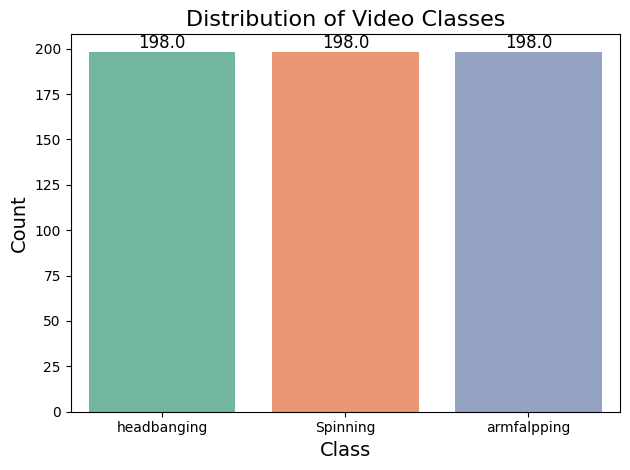

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot with a custom color palette
ax = sns.countplot(data=df, x='output', palette='Set2')  # Change 'Set2' to any desired palette

# Add value annotations on top of each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    ax.annotate(
        f'{height}',  # Text to display (the count)
        (p.get_x() + p.get_width() / 2, height),  # Position of the annotation
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=12,  # Font size
        color='black'  # Text color
    )

# Add labels and title
plt.xlabel('Class', fontsize=14)  # X-axis label
plt.ylabel('Count', fontsize=14)  # Y-axis label
plt.title('Distribution of Video Classes', fontsize=16)  # Plot title

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


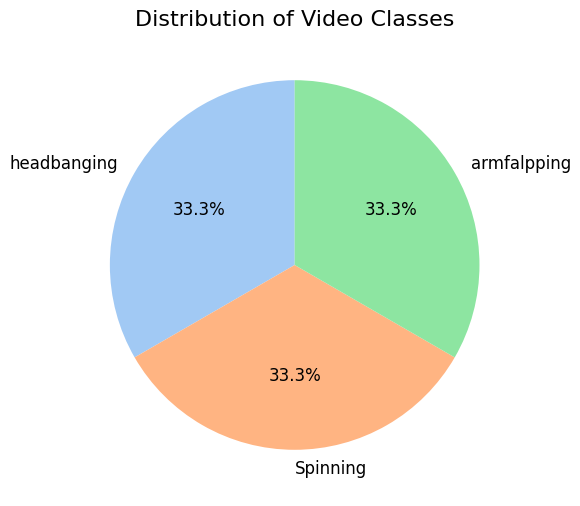

In [12]:
# Calculate value counts for the 'output' column
counts = df['output'].value_counts()

# Create a pie chart with pastel colors
plt.figure(figsize=(8, 6))
counts.plot.pie(
    autopct='%1.1f%%',  # Add percentage display
    startangle=90,      # Start angle for better readability
    colors=sns.color_palette('pastel'),  # Use a pastel palette
    textprops={'fontsize': 12}  # Adjust font size
)

plt.title('Distribution of Video Classes', fontsize=16)
plt.ylabel('')  # Remove the y-axis label for cleaner visualization
plt.show()


In [13]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
from sklearn.utils import shuffle
X,y=shuffle(X,y,random_state=0)

In [15]:
X.shape,y.shape

((594, 8400), (594,))

In [16]:
# Split into Input and Output Elements
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   test_size= 0.1, random_state=100, stratify=y)

In [17]:
X_train.shape ,X_test.shape, y_train.shape, y_test.shape

((534, 8400), (60, 8400), (534,), (60,))

In [18]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

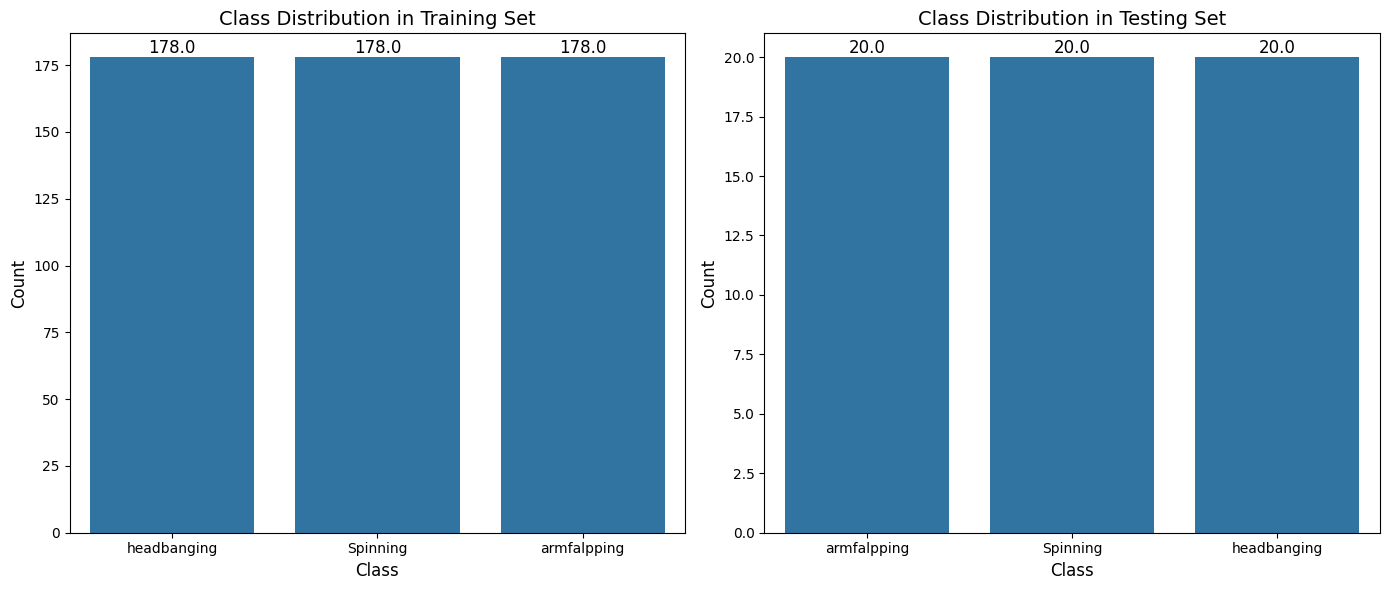

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Train data
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set', fontsize=14)  # Updated title
plt.xlabel('Class', fontsize=12)  # X-axis label
plt.ylabel('Count', fontsize=12)  # Y-axis label

# Add value annotations on top of each bar for train data
for p in ax1.patches:
    height = p.get_height()  # Get the height of the bar
    ax1.annotate(
        f'{height}',  # Text to display (the count)
        (p.get_x() + p.get_width() / 2, height),  # Position of the annotation
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=12,  # Font size
        color='black'  # Text color
    )

# Subplot 2: Test data
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x=y_test)
plt.title('Class Distribution in Testing Set', fontsize=14)  # Updated title
plt.xlabel('Class', fontsize=12)  # X-axis label
plt.ylabel('Count', fontsize=12)  # Y-axis label

# Add value annotations on top of each bar for test data
for p in ax2.patches:
    height = p.get_height()  # Get the height of the bar
    ax2.annotate(
        f'{height}',  # Text to display (the count)
        (p.get_x() + p.get_width() / 2, height),  # Position of the annotation
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=12,  # Font size
        color='black'  # Text color
    )

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.svm import  SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Dictionary of models
models = {
    'Logistic Regression': LogisticRegression(n_jobs=-1,random_state=0),
    'SGD': SGDClassifier(n_jobs=-1,random_state=0),
    'K Nearest Neighbors' : KNeighborsClassifier(n_jobs=-1),
    'Support Vector Machine': SVC(random_state=0),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(n_jobs=-1,random_state=0),
    'Bagging': BaggingClassifier(n_jobs=-1,random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),
    'Hist Gradient Boosting': HistGradientBoostingClassifier(random_state=0),
    'AdaBoosting': AdaBoostClassifier(random_state=0),
    'MLP':MLPClassifier(random_state=0)
}

In [21]:
import time
def train_ML_algorithms(X_train, y_train, X_test, y_test, models):

    results = []
    models_name = []
    predictions_dict = {}

    for name, model in tqdm(models.items()):
        # Start timing for training
        train_start_time = time.time()

        # Fit the model
        model.fit(X_train, y_train)

        # End timing for training
        train_end_time = time.time()
        training_time = train_end_time - train_start_time

        # Start timing for test predictions
        test_pred_start_time = time.time()

        # Test predictions
        y_test_pred = model.predict(X_test)

        # End timing for test predictions
        test_pred_end_time = time.time()
        test_pred_time = test_pred_end_time - test_pred_start_time

        # Train predictions
        y_train_pred = model.predict(X_train)

        # Save predictions
        predictions_dict[name] = {
            "y_train_pred": y_train_pred,
            "y_test_pred": y_test_pred
        }

        # Metrics
        accuracy_train = round(accuracy_score(y_train, y_train_pred), 3) * 100
        f1_train = round(f1_score(y_train, y_train_pred, average='weighted'), 3) * 100
        precision_train = round(precision_score(y_train, y_train_pred, average='weighted'), 3) * 100
        recall_train = round(recall_score(y_train, y_train_pred, average='weighted'), 3) * 100

        accuracy_test = round(accuracy_score(y_test, y_test_pred), 3) * 100
        f1_test = round(f1_score(y_test, y_test_pred, average='weighted'), 3) * 100
        precision_test = round(precision_score(y_test, y_test_pred, average='weighted'), 3) * 100
        recall_test = round(recall_score(y_test, y_test_pred, average='weighted'), 3) * 100

        models_name.append(name)
        results.append([
            accuracy_train, accuracy_test, precision_train, precision_test,
            recall_train, recall_test, f1_train, f1_test, training_time, test_pred_time
        ])

    # Create DataFrame for model metrics
    Model_accuracy = pd.DataFrame(
        results,
        index=models_name,
        columns=[
            'Accuracy Train', 'Accuracy Test', 'Precision Train', 'Precision Test',
            'Recall Train', 'Recall Test', 'F1 Score Train', 'F1 Score Test',
            'Training Time (s)', 'Test Prediction Time (s)'
        ]
    )
    return Model_accuracy, predictions_dict

In [22]:
def plot_models_accuracy_scores(Model_accuracy):

    # Plot training and test prediction times
    plt.figure(figsize=(10, 6))
    
    # Extract time columns
    time_columns = ['Training Time (s)', 'Test Prediction Time (s)']
    time_data = Model_accuracy[time_columns]
    
    # Plot
    bar_width = 0.4
    index = np.arange(len(time_data))
    
    bars_train_time = plt.bar(index, time_data['Training Time (s)'], width=bar_width, color='skyblue', label='Training Time (s)')
    bars_test_time = plt.bar(index + bar_width, time_data['Test Prediction Time (s)'], width=bar_width, color='lightcoral', label='Test Prediction Time (s)')
    
    # Add values on top of bars
    for bar in bars_train_time:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f"{bar.get_height():.5f}", ha='center', va='bottom', fontsize=8, rotation=90)
    for bar in bars_test_time:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f"{bar.get_height():.5f}", ha='center', va='bottom', fontsize=8, rotation=90)
    
    # Add details
    plt.title('Training and Test Prediction Times')
    plt.xlabel('Models')
    plt.ylabel('Time (seconds)')
    plt.xticks(index + bar_width / 2, time_data.index, rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Move legend outside
    plt.tight_layout()
    # Set y-limit 
    plt.ylim(0, int(time_data.max().max())+15) 
    plt.show()

    # Rest of the original code for plotting accuracy, precision, recall, and F1 scores
    print("Models accuracy for each Machine Learning Algorithm")
    
    # Increase the width of the bars
    bar_width = 0.85  # Increase the width of the bars
    
    # Plotting the first 6 models
    fig, ax = plt.subplots(figsize=(14, 8))  # Increase the size of the figure
    Model_accuracy.iloc[:6,:-2].plot(kind='bar', ax=ax, width=bar_width)
    
    # Customizing the plot
    plt.xlabel('Model', fontsize=14)
    plt.ylabel('Scores', fontsize=14)
    plt.title('Model Accuracy Scores', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)  # Rotate model names for better readability
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Move legend outside
    plt.tight_layout()  # Adjust layout to fit labels
    
    # Set y-limit
    ax.set_ylim(0, 119)
    
    # Annotate each bar
    for p in ax.patches:
        height = p.get_height()
        
        # Adjust the annotation position to ensure it stays within bounds
        y_position = height + 0.05 if height + 0.05 <= ax.get_ylim()[1] else height - 0.05
        
        ax.annotate(f"{height:.1f}", 
                    (p.get_x() + p.get_width() / 2, y_position), 
                    ha='center', va='bottom', fontsize=12, rotation=90)  # Increase font size in annotations
    
    # Display the plot
    plt.show()
    print("""
    
    """)
    
    # Plotting the remaining models
    fig, ax = plt.subplots(figsize=(14, 8))  # Increase the size of the figure
    Model_accuracy.iloc[6:,:-2].plot(kind='bar', ax=ax, width=bar_width)
    
    # Customizing the plot
    plt.title('Model Accuracy Scores', fontsize=16)
    plt.xlabel('Model', fontsize=14)
    plt.ylabel('Scores', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)  # Rotate model names for better readability
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Move legend outside
    plt.tight_layout()  # Adjust layout to fit labels
    
    # Set y-limit
    ax.set_ylim(0, 119)
    
    # Annotate each bar
    for p in ax.patches:
        height = p.get_height()
        
        # Adjust the annotation position to ensure it stays within bounds
        y_position = height + 0.05 if height + 0.05 <= ax.get_ylim()[1] else height - 0.05
        
        ax.annotate(f"{height:.1f}", 
                    (p.get_x() + p.get_width() / 2, y_position), 
                    ha='center', va='bottom', fontsize=12, rotation=90)  # Increase font size in annotations
    
    # Display the plot
    plt.show()
    
    print("\n=== Models' Training vs. Testing Scores by Metric ===\n")

    # Group plots for Training and Testing metrics
    train_indices = list(range(0, len(Model_accuracy.columns), 2))[:-1]
    test_indices = list(range(1, len(Model_accuracy.columns), 2))[:-1]
    
    # Set a wider bar width
    bar_width = 0.85
    
    # Plot training metrics
    ax = Model_accuracy.iloc[:, train_indices].plot(
        kind='bar', figsize=(12, 6), width=bar_width,
    )
    
    # Set y-limit 
    ax.set_ylim(0, 119) 
    
    # Annotate each bar
    for p in ax.patches:
        height = p.get_height()
        
        # Adjust the annotation position to ensure it stays within bounds
        y_position = height + 0.05 if height + 0.05 <= ax.get_ylim()[1] else height - 0.05
        
        ax.annotate(f"{height:.1f}", 
                    (p.get_x() + p.get_width() / 2, y_position), 
                    ha='center', va='bottom', fontsize=10, rotation=90)
    
    plt.title('Training Metrics (Accuracy, Precision, Recall, F1)', fontsize=14)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('Scores', fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Move legend outside
    plt.tight_layout()
    plt.show()
    
    # Plot testing metrics
    ax = Model_accuracy.iloc[:, test_indices].plot(
        kind='bar', figsize=(12, 6), width=bar_width,
    )
    
    # Set y-limit 
    ax.set_ylim(0, 119) 
    
    # Annotate each bar
    for p in ax.patches:
        height = p.get_height()
        
        # Adjust the annotation position to ensure it stays within bounds
        y_position = height + 0.05 if height + 0.05 <= ax.get_ylim()[1] else height - 0.05
        
        ax.annotate(f"{height:.1f}", 
                    (p.get_x() + p.get_width() / 2, y_position), 
                    ha='center', va='bottom', fontsize=10, rotation=90)
    
    plt.title('Testing Metrics (Accuracy, Precision, Recall, F1)', fontsize=14)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('Scores', fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Move legend outside
    plt.tight_layout()
    plt.show()

    print("\n=== Individual Metric Comparisons (Training vs. Testing) ===\n")

    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    for metric in metrics:
        plt.figure(figsize=(10, 6))

        # Extract train and test columns for the metric
        metric_train = f'{metric} Train'
        metric_test = f'{metric} Test'

        # Sort by training metric for better readability
        sorted_accuracy = Model_accuracy.sort_values(by=metric_train, ascending=False)
        index = np.arange(len(sorted_accuracy))

        # Plot
        bar_width = 0.4
        bars_train = plt.bar(index, sorted_accuracy[metric_train], width=bar_width, color='skyblue', label=metric_train)
        bars_test = plt.bar(index + bar_width, sorted_accuracy[metric_test], width=bar_width, color='lightcoral', label=metric_test)

        # Add values on top of bars
        for bar in bars_train:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{bar.get_height():.1f}", ha='center', va='bottom', fontsize=8,rotation=90)
        for bar in bars_test:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{bar.get_height():.1f}", ha='center', va='bottom', fontsize=8,rotation=90)

        # Add details
        plt.title(f'Comparison of {metric} (Training vs Testing)')
        plt.xlabel('Models')
        plt.ylabel(f'{metric} Scores')
        plt.xticks(index + bar_width / 2, sorted_accuracy.index, rotation=90)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Move legend outside
        plt.tight_layout()
        plt.ylim(0,119)
        plt.show()

    # Add the provided code here
    plt.show()

In [23]:
def display_metrics(y_tain,y_test, predictions_dict):

    class_names = ["headbanging", "Spinning", "armfalpping"]


    for model_name, preds in predictions_dict.items():
        print(f"\n=== Metrics for Model: {model_name} ===")

        # Display metrics for training predictions
        print("\nTraining Metrics:")
        print("Classification Report:")
        print(classification_report(y_tain, preds["y_train_pred"], target_names=class_names))
        cm_train = confusion_matrix(y_tain, preds["y_train_pred"])
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.title(f"Confusion Matrix Heatmap (Training - {model_name})")
        plt.show()

        # Display metrics for testing predictions
        print("\nTesting Metrics:")
        print("Classification Report:")
        print(classification_report(y_test, preds["y_test_pred"], target_names=class_names))
        cm_test = confusion_matrix(y_test, preds["y_test_pred"])
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.title(f"Confusion Matrix Heatmap (Testing - {model_name})")
        plt.show()


In [24]:
Model_accuracy , predictions_dict = train_ML_algorithms(X_train,y_train,X_test,y_test,models)

100%|██████████| 11/11 [26:22<00:00, 143.84s/it]


In [25]:
Model_accuracy.sort_values(by='Accuracy Test',ascending=False,inplace=True)
Model_accuracy

,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test,F1 Score Train,F1 Score Test,Training Time (s),Test Prediction Time (s)
Gradient Boosting,100.0,96.7,100.0,97.0,100.0,96.7,100.0,96.7,1301.294438,0.004146
Hist Gradient Boosting,100.0,96.7,100.0,97.0,100.0,96.7,100.0,96.7,134.078261,0.011074
Random Forest,100.0,95.0,100.0,95.0,100.0,95.0,100.0,95.0,1.400805,0.028655
K Nearest Neighbors,95.5,93.3,95.5,93.4,95.5,93.3,95.5,93.3,0.041956,0.236216
Bagging,99.8,91.7,99.8,91.9,99.8,91.7,99.8,91.7,17.814382,0.187158
MLP,100.0,91.7,100.0,92.0,100.0,91.7,100.0,91.6,38.565418,0.002994
Logistic Regression,100.0,88.3,100.0,88.3,100.0,88.3,100.0,88.3,3.968774,0.008017
Support Vector Machine,89.7,86.7,90.4,86.8,89.7,86.7,89.8,86.6,1.103895,0.185572
SGD,95.1,81.7,95.1,82.4,95.1,81.7,95.1,81.7,0.387767,0.000997
Decision Tree,100.0,80.0,100.0,80.7,100.0,80.0,100.0,80.1,6.408807,0.002023


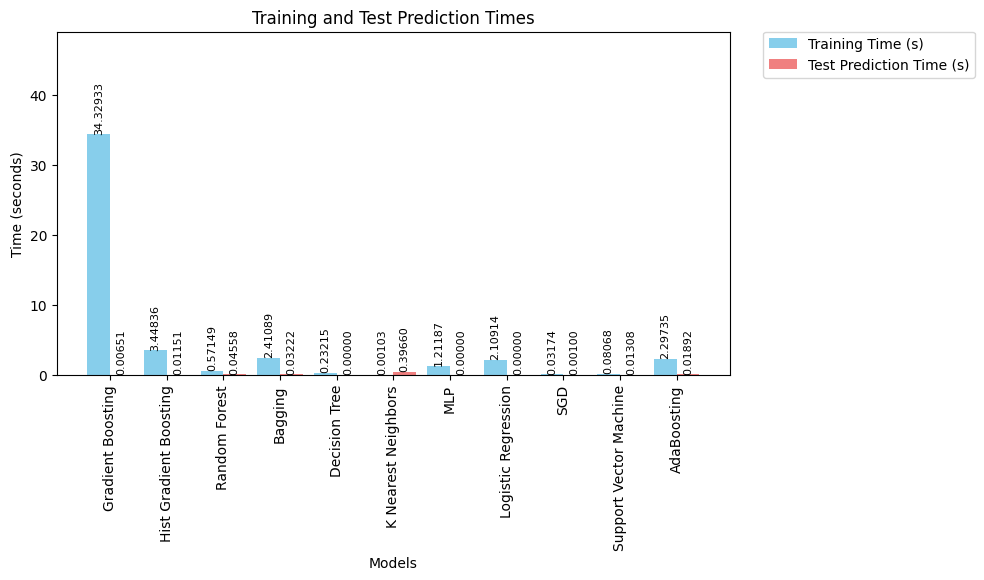

Models accuracy for each Machine Learning Algorithm


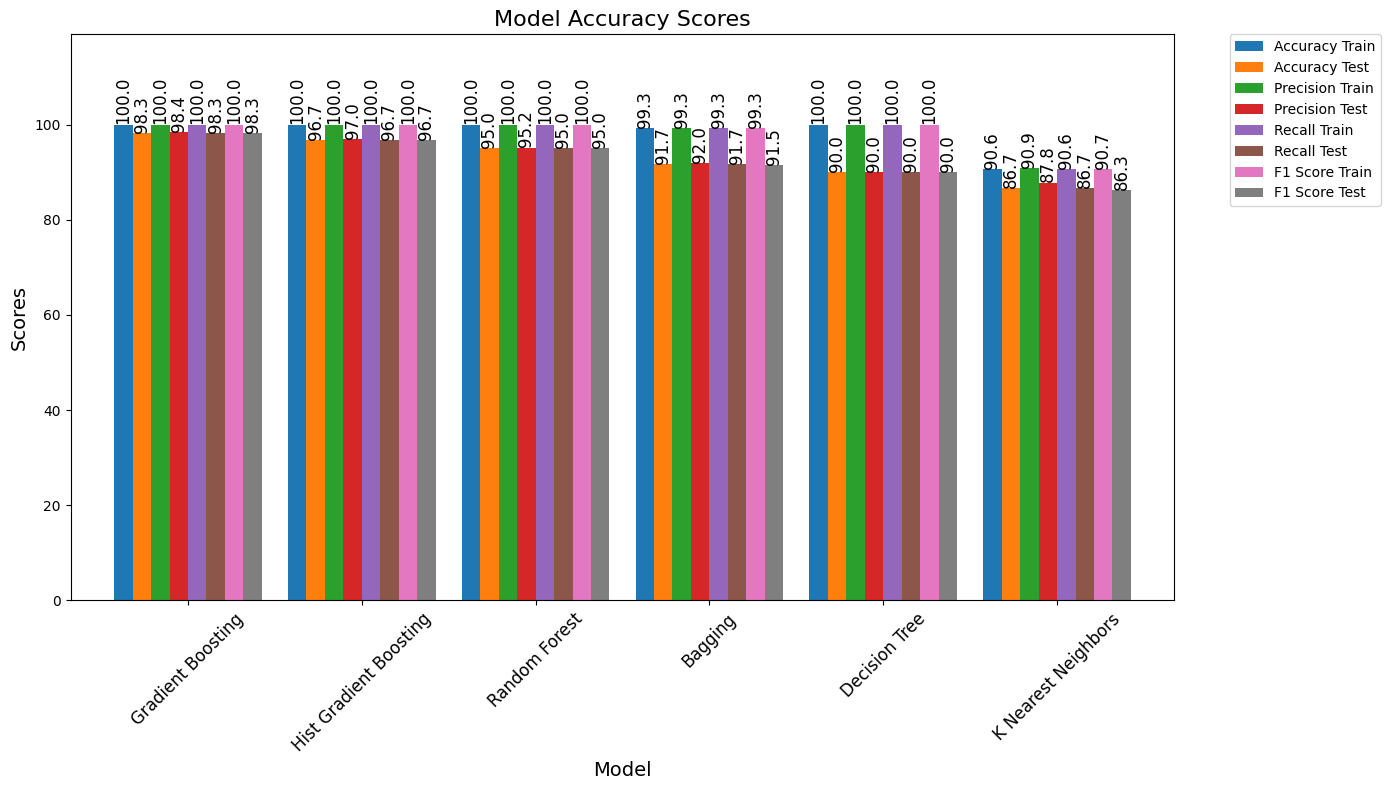

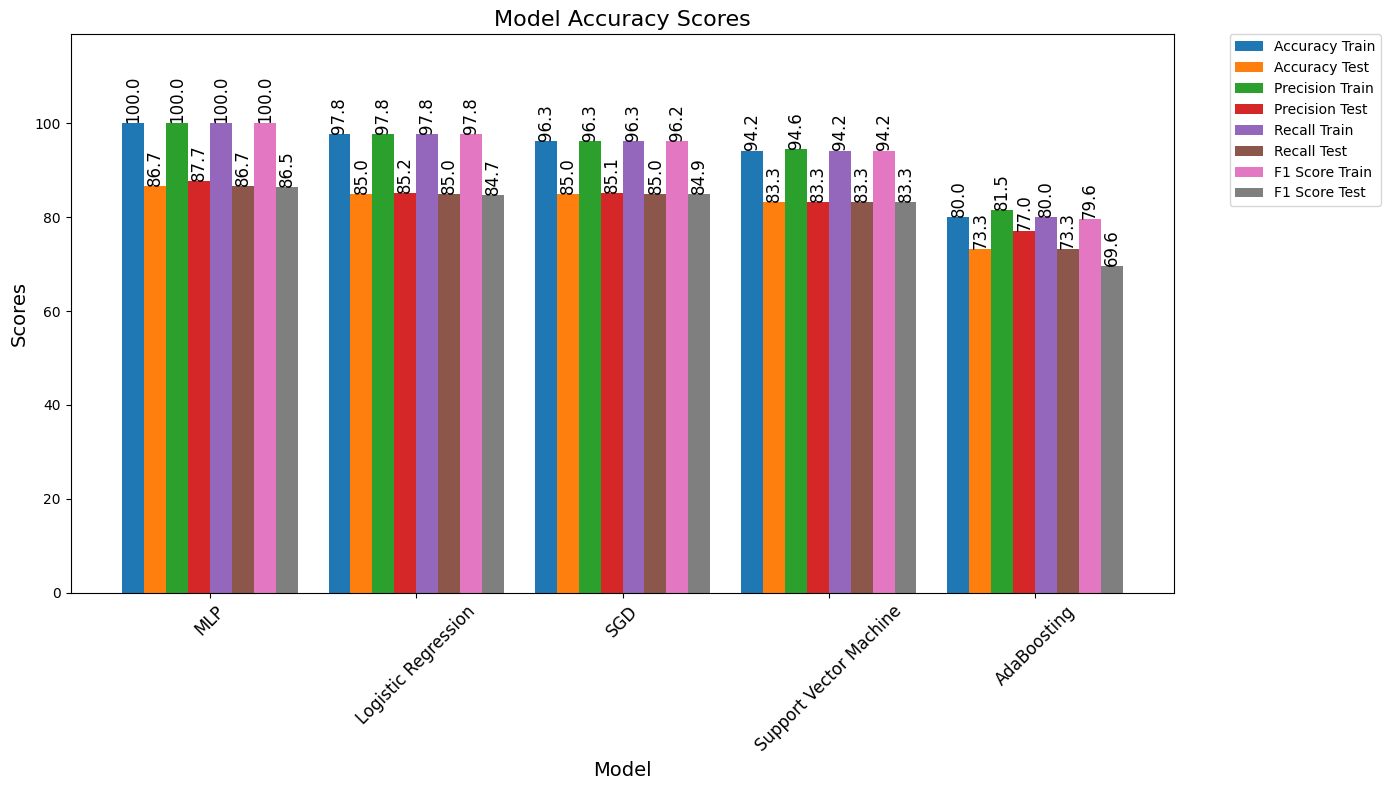


=== Models' Training vs. Testing Scores by Metric ===



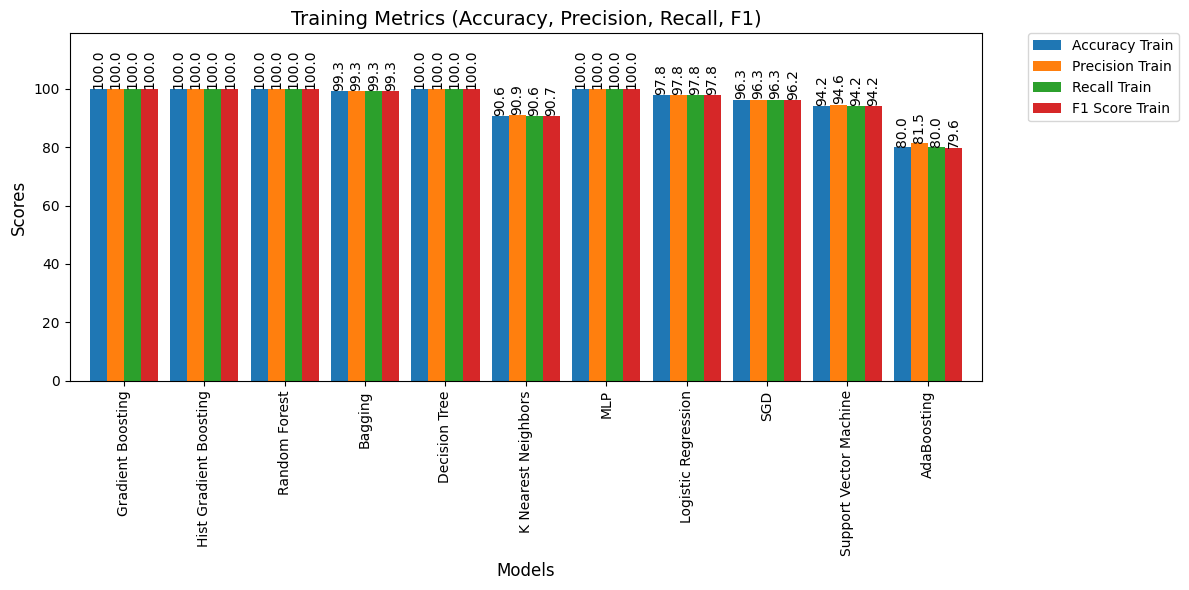

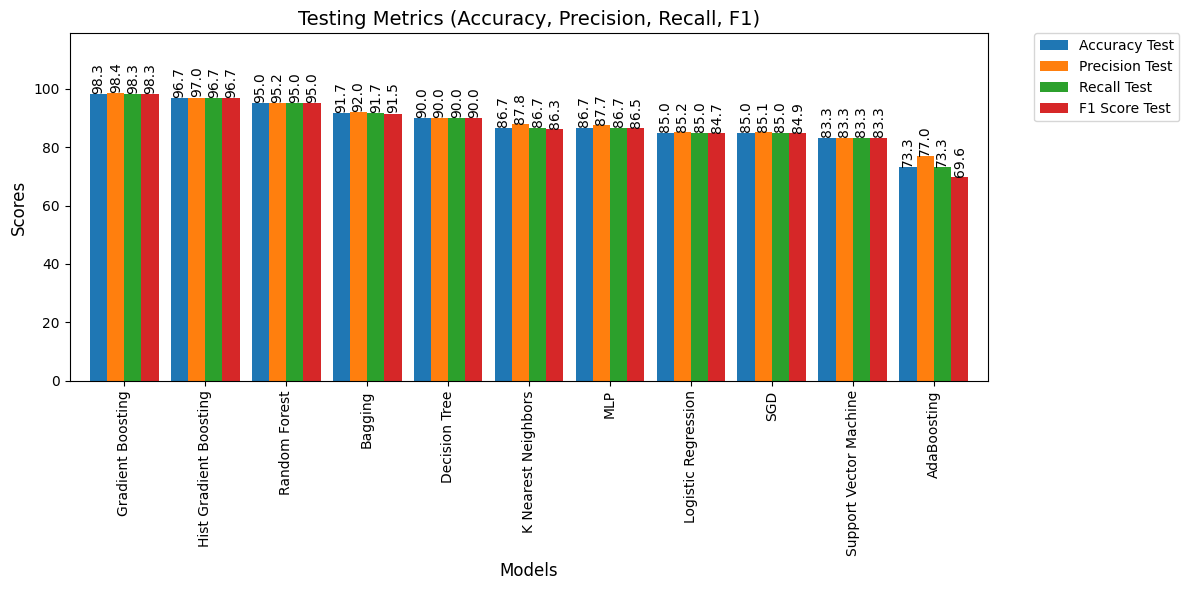


=== Individual Metric Comparisons (Training vs. Testing) ===



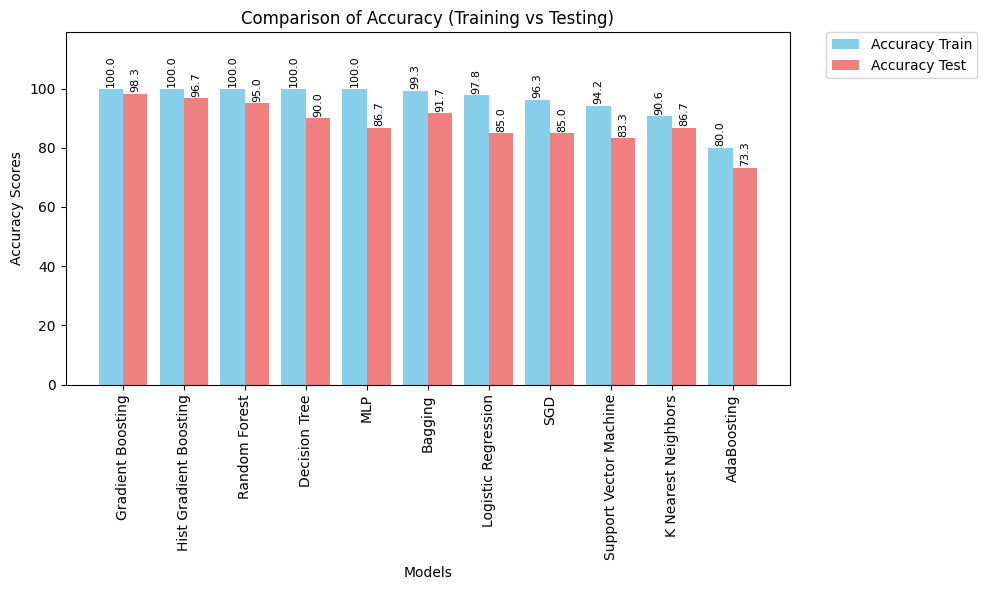

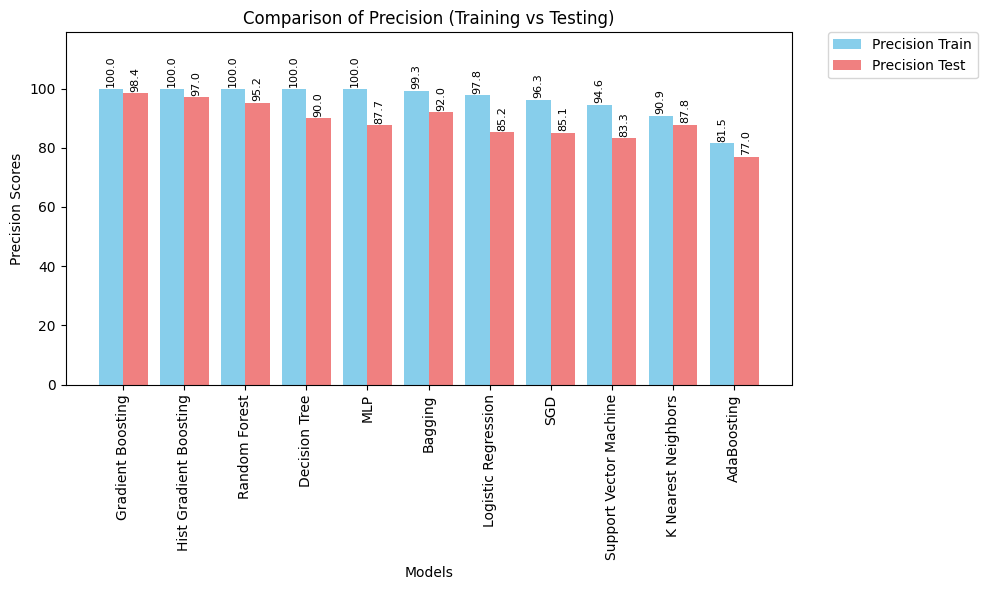

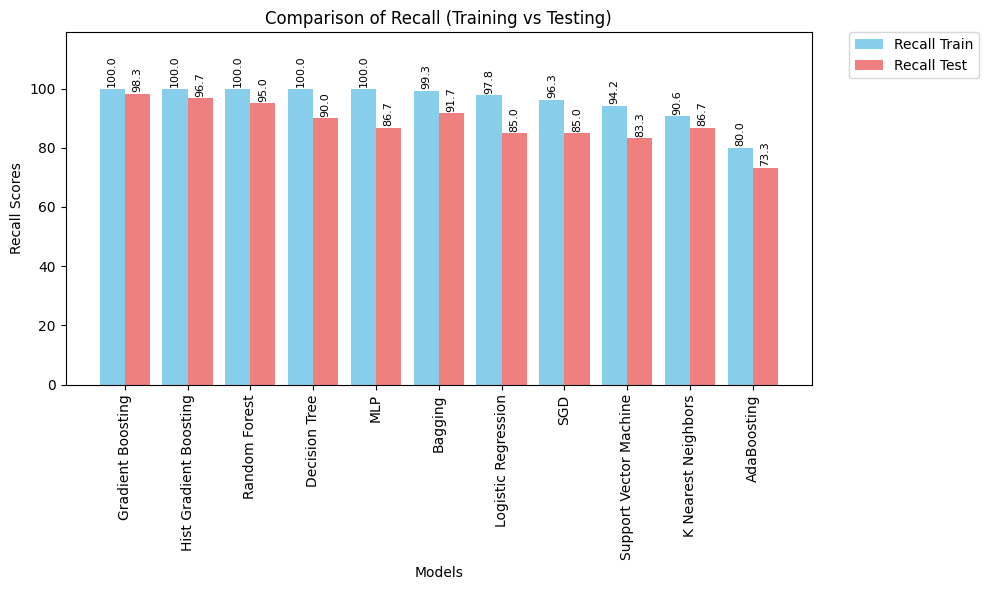

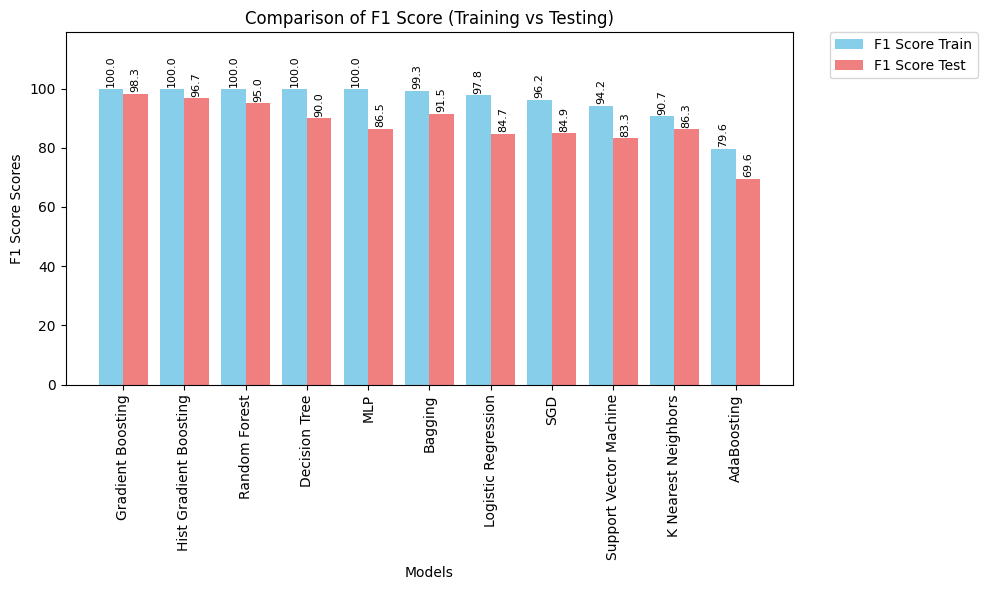

In [27]:
plot_models_accuracy_scores(Model_accuracy)


=== Metrics for Model: Logistic Regression ===

Training Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       0.97      0.99      0.98       178
    Spinning       0.99      0.98      0.99       178
 armfalpping       0.98      0.96      0.97       178

    accuracy                           0.98       534
   macro avg       0.98      0.98      0.98       534
weighted avg       0.98      0.98      0.98       534



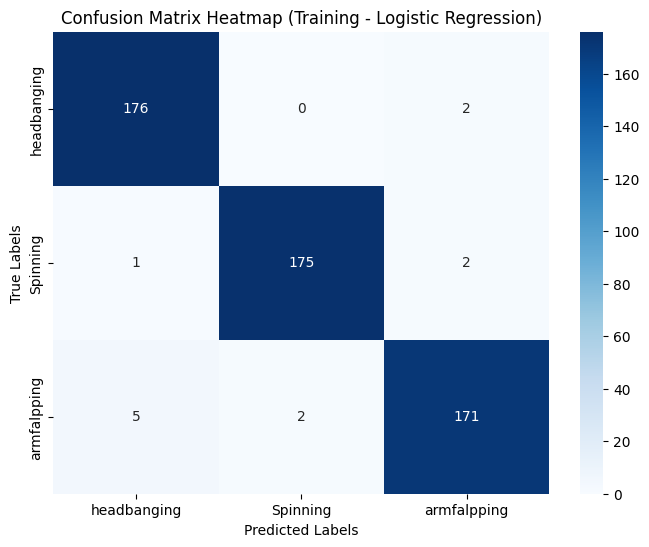


Testing Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       0.83      0.75      0.79        20
    Spinning       0.89      0.80      0.84        20
 armfalpping       0.83      1.00      0.91        20

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



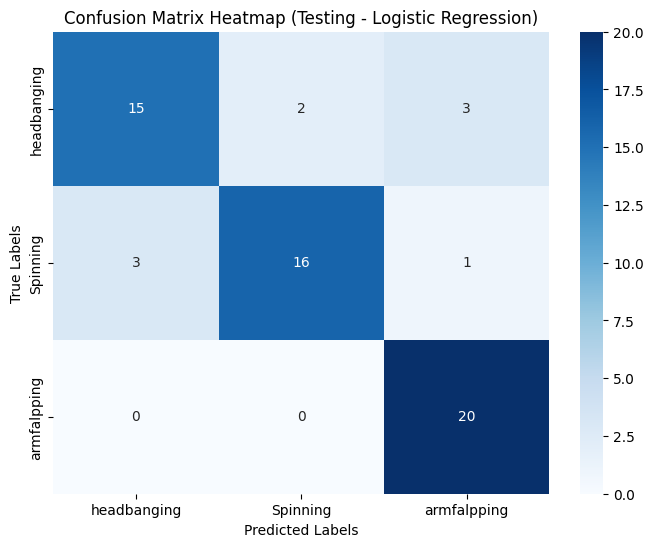


=== Metrics for Model: SGD ===

Training Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       0.96      0.98      0.97       178
    Spinning       0.97      0.97      0.97       178
 armfalpping       0.96      0.93      0.95       178

    accuracy                           0.96       534
   macro avg       0.96      0.96      0.96       534
weighted avg       0.96      0.96      0.96       534



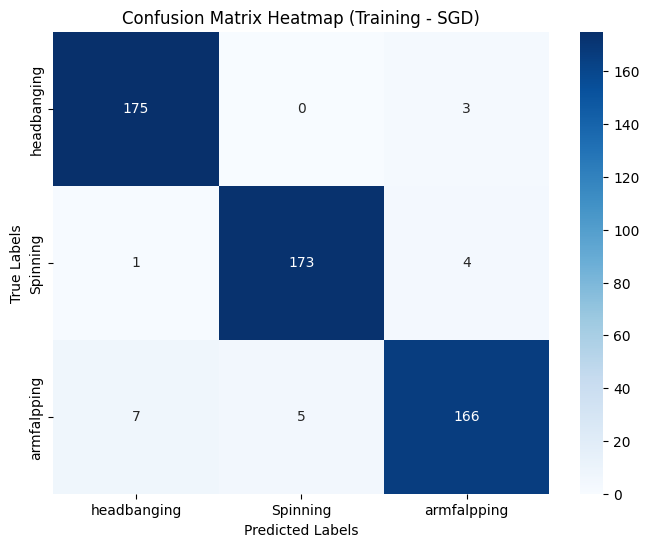


Testing Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       0.80      0.80      0.80        20
    Spinning       0.89      0.80      0.84        20
 armfalpping       0.86      0.95      0.90        20

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



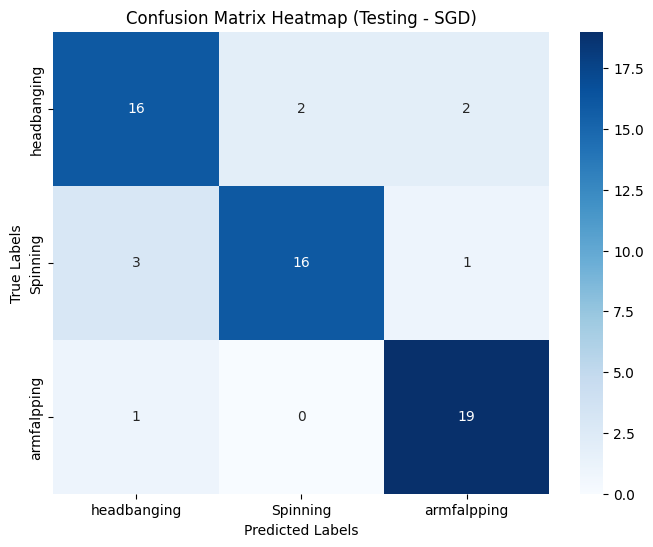


=== Metrics for Model: K Nearest Neighbors ===

Training Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       0.97      0.89      0.93       178
    Spinning       0.87      0.93      0.90       178
 armfalpping       0.88      0.90      0.89       178

    accuracy                           0.91       534
   macro avg       0.91      0.91      0.91       534
weighted avg       0.91      0.91      0.91       534



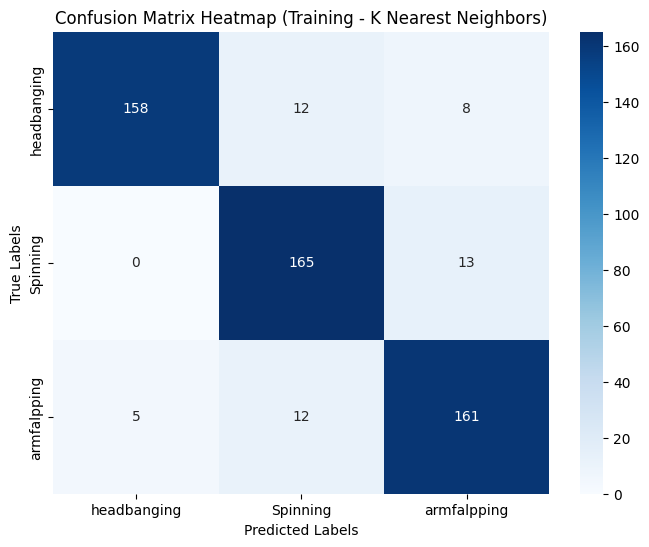


Testing Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       0.93      0.70      0.80        20
    Spinning       0.90      0.90      0.90        20
 armfalpping       0.80      1.00      0.89        20

    accuracy                           0.87        60
   macro avg       0.88      0.87      0.86        60
weighted avg       0.88      0.87      0.86        60



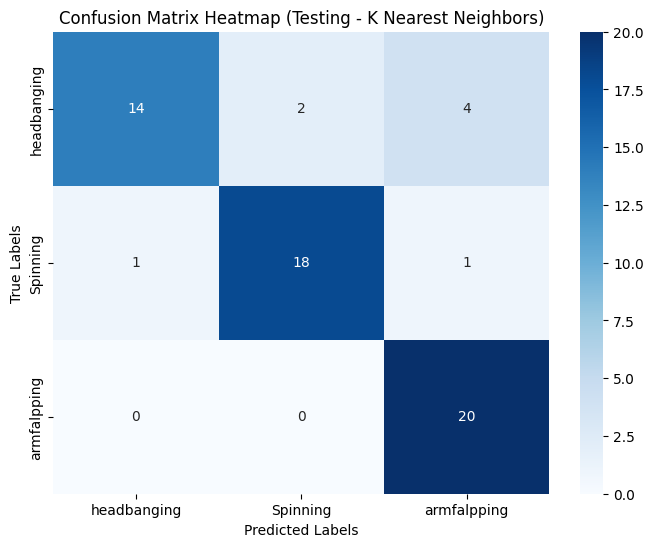


=== Metrics for Model: Support Vector Machine ===

Training Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       1.00      0.93      0.96       178
    Spinning       0.88      0.99      0.93       178
 armfalpping       0.95      0.91      0.93       178

    accuracy                           0.94       534
   macro avg       0.95      0.94      0.94       534
weighted avg       0.95      0.94      0.94       534



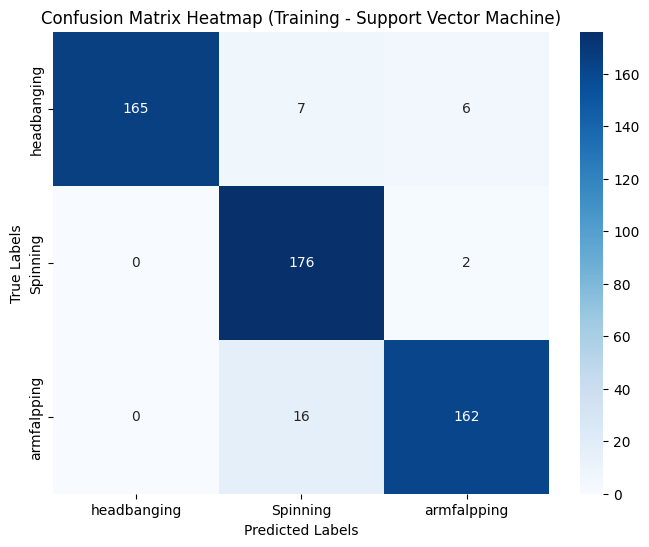


Testing Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       0.90      0.90      0.90        20
    Spinning       0.80      0.80      0.80        20
 armfalpping       0.80      0.80      0.80        20

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



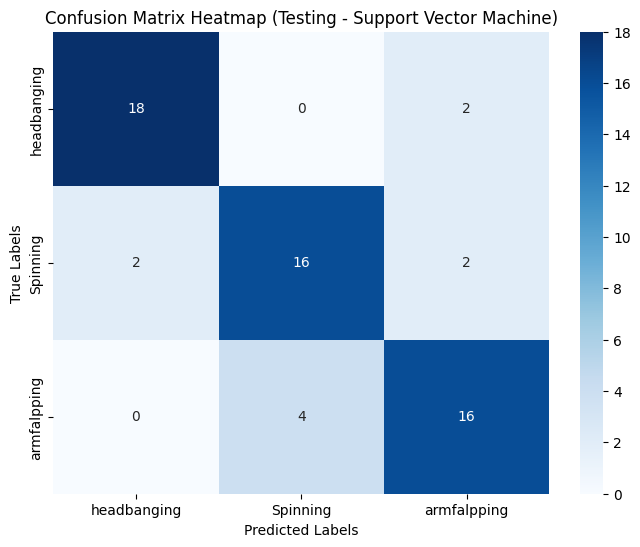


=== Metrics for Model: Decision Tree ===

Training Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       1.00      1.00      1.00       178
    Spinning       1.00      1.00      1.00       178
 armfalpping       1.00      1.00      1.00       178

    accuracy                           1.00       534
   macro avg       1.00      1.00      1.00       534
weighted avg       1.00      1.00      1.00       534



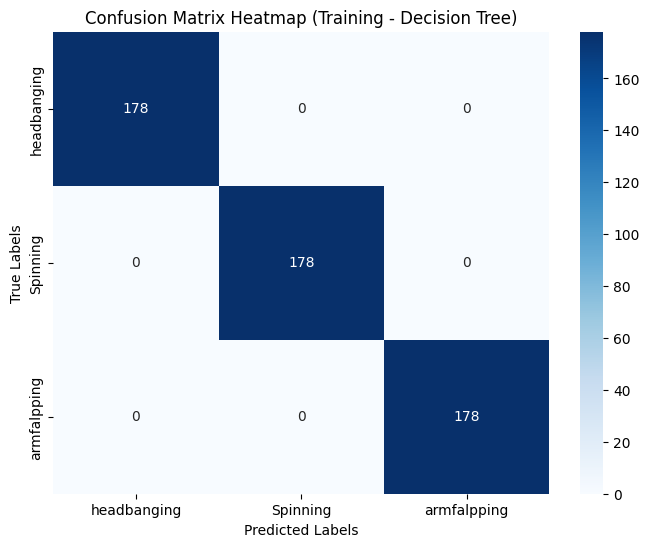


Testing Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       0.90      0.90      0.90        20
    Spinning       0.90      0.90      0.90        20
 armfalpping       0.90      0.90      0.90        20

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



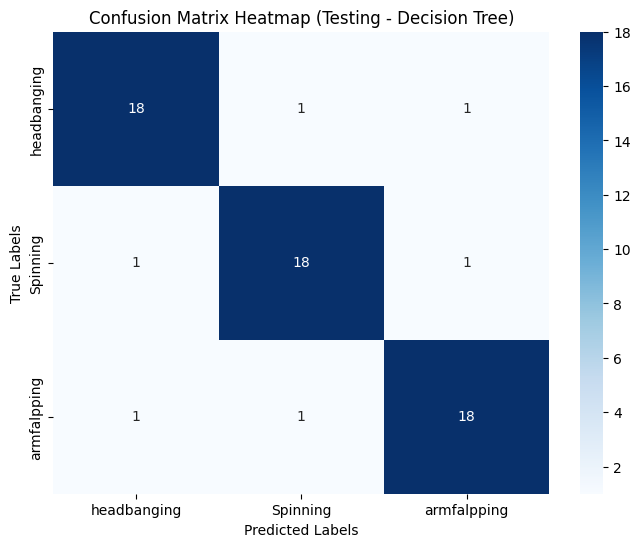


=== Metrics for Model: Random Forest ===

Training Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       1.00      1.00      1.00       178
    Spinning       1.00      1.00      1.00       178
 armfalpping       1.00      1.00      1.00       178

    accuracy                           1.00       534
   macro avg       1.00      1.00      1.00       534
weighted avg       1.00      1.00      1.00       534



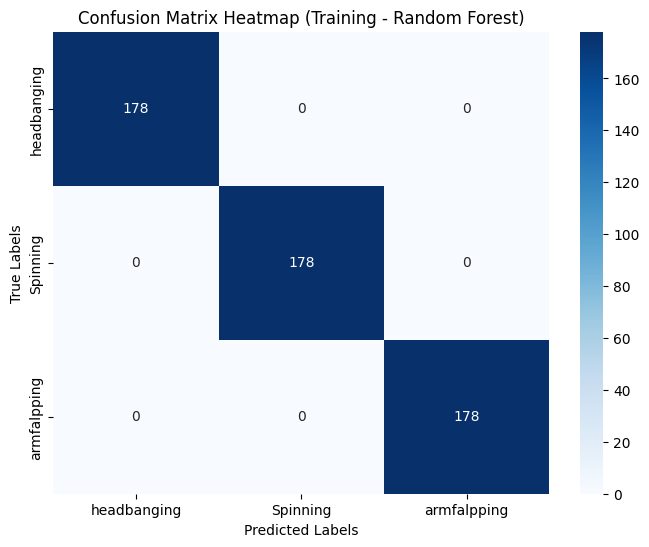


Testing Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       0.91      1.00      0.95        20
    Spinning       0.95      0.90      0.92        20
 armfalpping       1.00      0.95      0.97        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



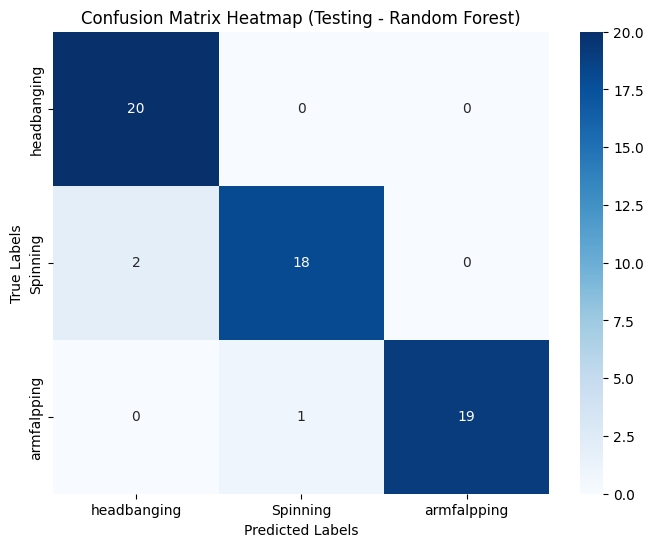


=== Metrics for Model: Bagging ===

Training Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       0.99      0.99      0.99       178
    Spinning       0.98      0.99      0.99       178
 armfalpping       1.00      0.99      1.00       178

    accuracy                           0.99       534
   macro avg       0.99      0.99      0.99       534
weighted avg       0.99      0.99      0.99       534



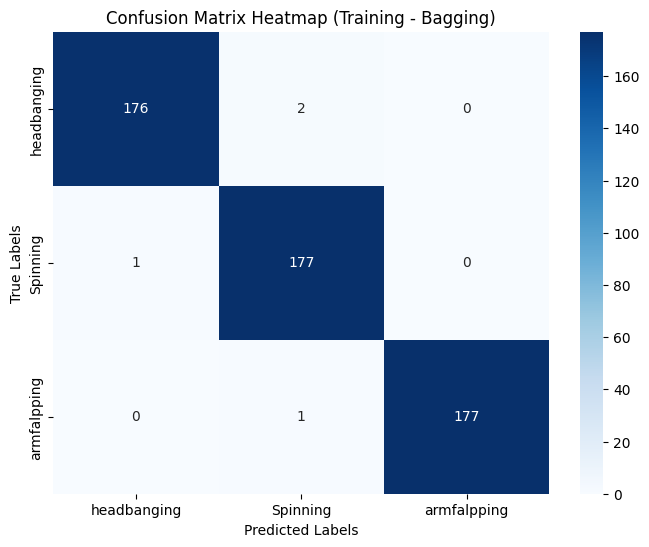


Testing Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       0.87      1.00      0.93        20
    Spinning       0.94      0.80      0.86        20
 armfalpping       0.95      0.95      0.95        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



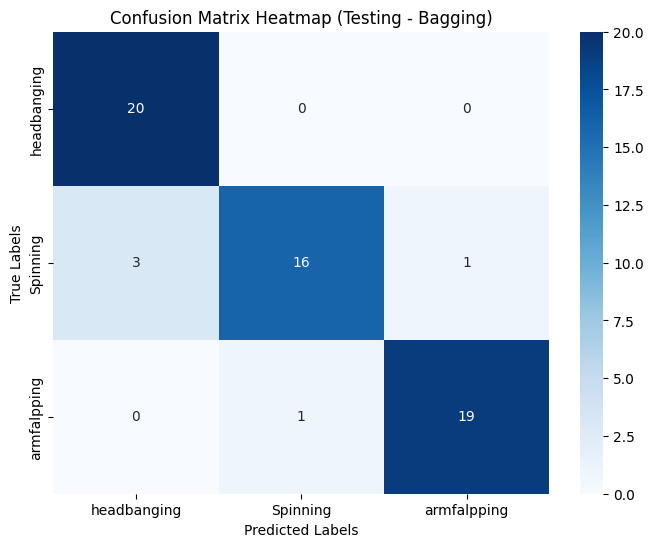


=== Metrics for Model: Gradient Boosting ===

Training Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       1.00      1.00      1.00       178
    Spinning       1.00      1.00      1.00       178
 armfalpping       1.00      1.00      1.00       178

    accuracy                           1.00       534
   macro avg       1.00      1.00      1.00       534
weighted avg       1.00      1.00      1.00       534



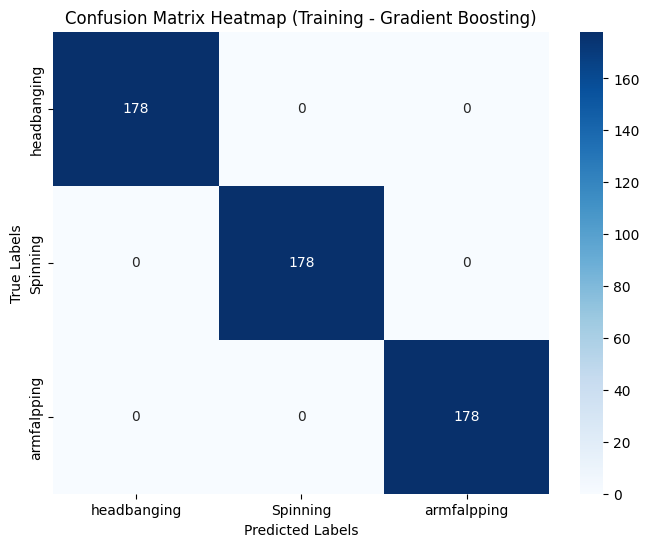


Testing Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       0.95      1.00      0.98        20
    Spinning       1.00      0.95      0.97        20
 armfalpping       1.00      1.00      1.00        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



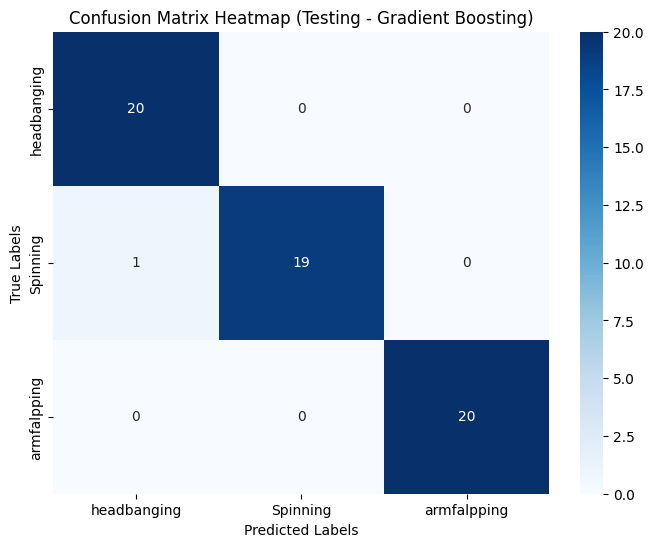


=== Metrics for Model: Hist Gradient Boosting ===

Training Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       1.00      1.00      1.00       178
    Spinning       1.00      1.00      1.00       178
 armfalpping       1.00      1.00      1.00       178

    accuracy                           1.00       534
   macro avg       1.00      1.00      1.00       534
weighted avg       1.00      1.00      1.00       534



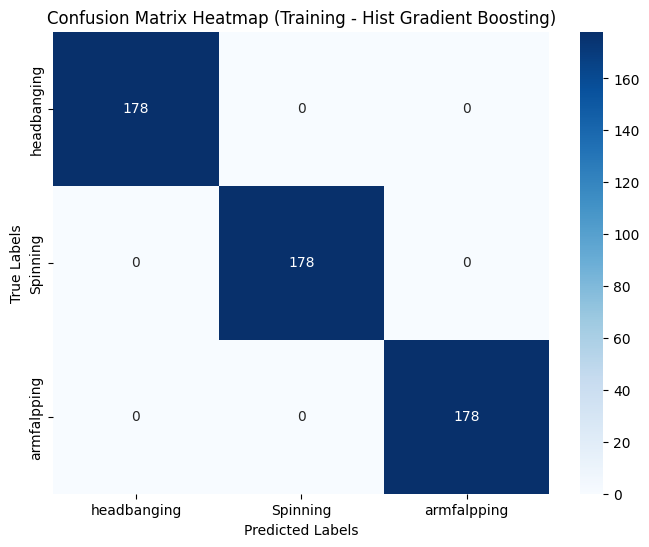


Testing Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       0.91      1.00      0.95        20
    Spinning       1.00      0.90      0.95        20
 armfalpping       1.00      1.00      1.00        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



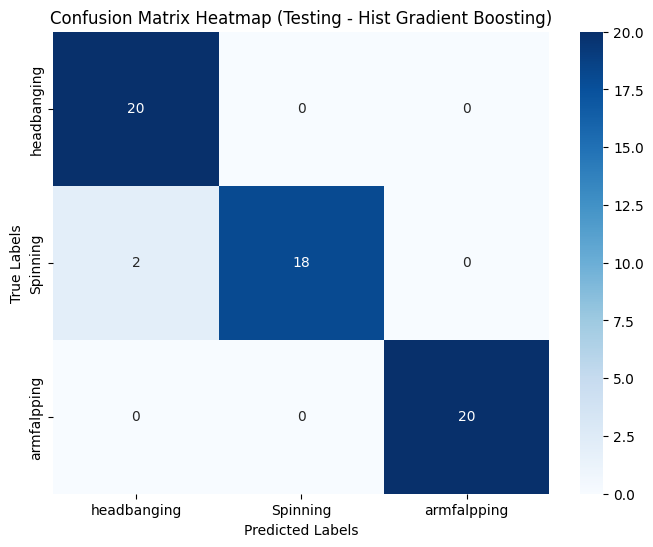


=== Metrics for Model: AdaBoosting ===

Training Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       0.98      0.98      0.98       178
    Spinning       0.81      0.56      0.66       178
 armfalpping       0.66      0.86      0.74       178

    accuracy                           0.80       534
   macro avg       0.82      0.80      0.80       534
weighted avg       0.82      0.80      0.80       534



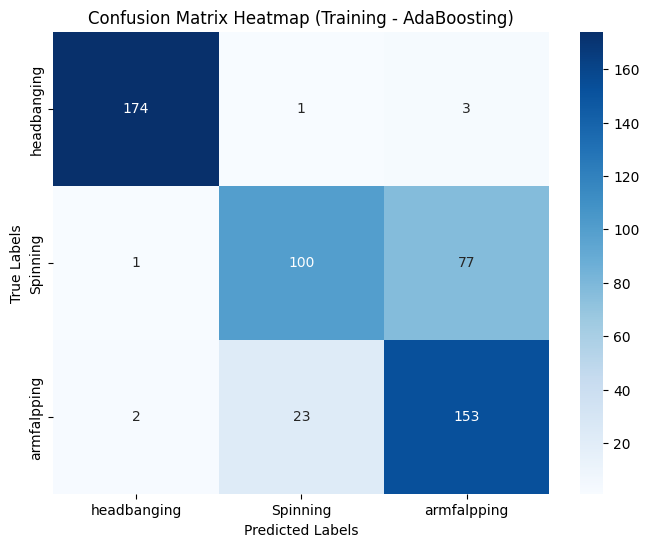


Testing Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       0.83      1.00      0.91        20
    Spinning       0.86      0.30      0.44        20
 armfalpping       0.62      0.90      0.73        20

    accuracy                           0.73        60
   macro avg       0.77      0.73      0.70        60
weighted avg       0.77      0.73      0.70        60



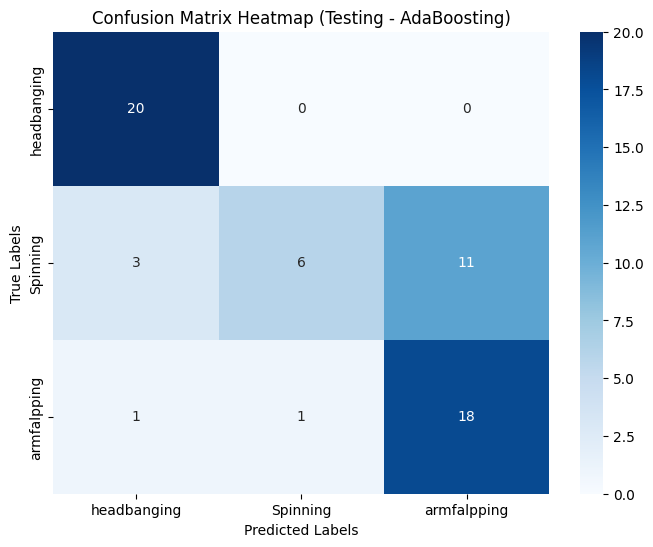


=== Metrics for Model: MLP ===

Training Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       1.00      1.00      1.00       178
    Spinning       1.00      1.00      1.00       178
 armfalpping       1.00      1.00      1.00       178

    accuracy                           1.00       534
   macro avg       1.00      1.00      1.00       534
weighted avg       1.00      1.00      1.00       534



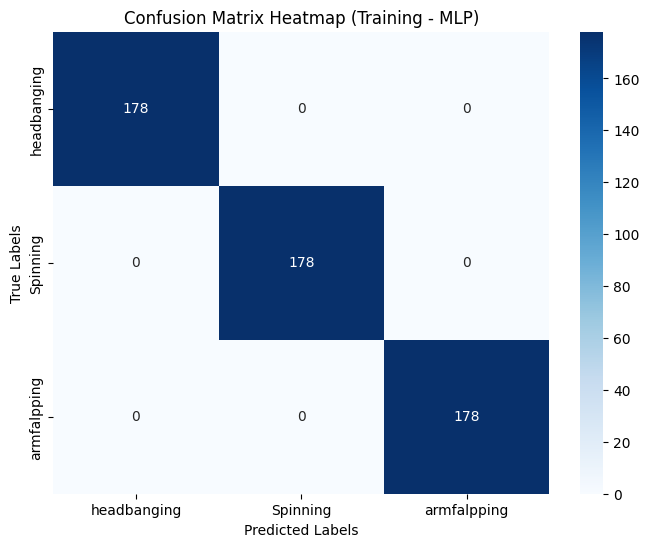


Testing Metrics:
Classification Report:
              precision    recall  f1-score   support

 headbanging       0.94      0.75      0.83        20
    Spinning       0.89      0.85      0.87        20
 armfalpping       0.80      1.00      0.89        20

    accuracy                           0.87        60
   macro avg       0.88      0.87      0.86        60
weighted avg       0.88      0.87      0.86        60



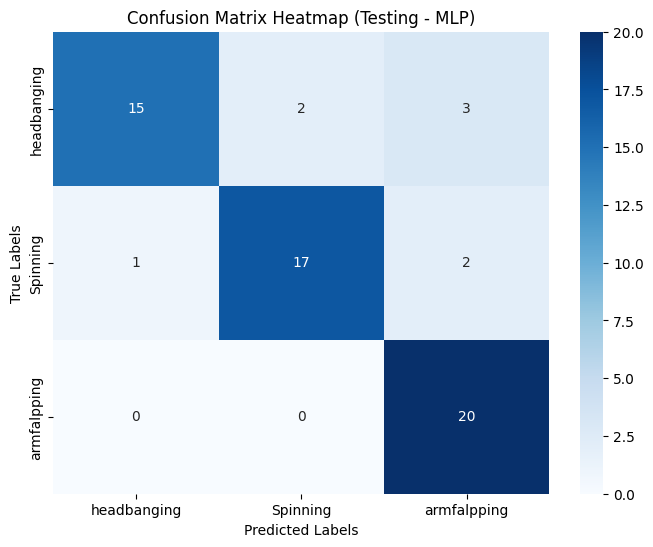

In [28]:
# Assuming predictions_dict from the train_ML_algorithms function
display_metrics(y_train,y_test, predictions_dict)


In [30]:
import joblib
import os

# Create a directory to save models
os.makedirs("saved_models_all", exist_ok=True)

# Save each trained model
for name, model in models.items():
    joblib.dump(model, f"saved_models_all/{name}.joblib")
    print(f"Model {name} saved successfully!")


Model Logistic Regression saved successfully!
Model SGD saved successfully!
Model K Nearest Neighbors saved successfully!
Model Support Vector Machine saved successfully!
Model Decision Tree saved successfully!
Model Random Forest saved successfully!
Model Bagging saved successfully!
Model Gradient Boosting saved successfully!
Model Hist Gradient Boosting saved successfully!
Model AdaBoosting saved successfully!
Model MLP saved successfully!


In [9]:
d2= pd.read_csv('Augment Models accuracy with Robustscaller All points.csv')


In [10]:
d2

,Unnamed: 0,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test,F1 Score Train,F1 Score Test,Training Time (s),Test Prediction Time (s)
0,K Nearest Neighbors,90.4,88.3,90.8,89.9,90.4,88.3,90.5,88.3,0.001171,0.026140
1,MLP,100.0,85.0,100.0,85.6,100.0,85.0,100.0,85.1,0.635340,0.000403
2,Random Forest,100.0,83.3,100.0,83.9,100.0,83.3,100.0,83.5,0.282005,0.023221
3,Hist Gradient Boosting,100.0,83.3,100.0,84.4,100.0,83.3,100.0,83.5,1.109578,0.006734
4,Gradient Boosting,100.0,81.7,100.0,82.2,100.0,81.7,100.0,81.7,2.963712,0.001168
5,Support Vector Machine,94.9,80.0,95.2,80.7,94.9,80.0,95.0,80.2,0.030231,0.002670
6,AdaBoosting,85.8,73.3,85.7,73.1,85.8,73.3,85.7,73.1,0.289370,0.005001
7,Bagging,100.0,70.0,100.0,71.1,100.0,70.0,100.0,70.2,0.640850,0.012057
8,Decision Tree,100.0,68.3,100.0,68.9,100.0,68.3,100.0,68.3,0.026579,0.000167
9,SGD,68.9,61.7,69.2,63.9,68.9,61.7,68.8,61.1,0.016189,0.000262


In [31]:
joblib.dump(pca, 'PCA.joblib') 
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [33]:
scaler = joblib.load('saved_models/scaler.joblib')

In [ ]:
import numpy as np
import cv2
import pandas as pd
import time
from joblib import load
from rtmlib.tools.solution import PoseTracker, Wholebody
import glob as gb
from tqdm import tqdm

# Configuration for PoseTracker
device = 'cuda'  # 'cpu' or 'cuda'
backend = 'onnxruntime'  # 'opencv', 'onnxruntime', 'openvino'
openpose_skeleton = False  # True for openpose-style, False for mmpose-style

# Initialize PoseTracker
body_feet_tracker = PoseTracker(
    Wholebody,
    det_frequency=7,
    tracking=True,
    to_openpose=openpose_skeleton,
    mode='performance',  # balanced, performance, lightweight
    backend=backend,
    device=device
)

# Load the machine learning models
classes = ['headbanging', 'Spinning', 'armfalpping']
gradient = load('saved_models/Gradient Boosting.joblib')
scaler = load('saved_models/scaler.joblib')

# Define the body keypoints you want to track (ensure all are within the valid range: 0-32)
keypoints = [1, 6, 7, 8, 9, 10, 11, 13, 15, 17, 92, 113, 96, 100, 104, 108, 112, 117, 121, 125, 129, 133]  # Adjusted valid keypoints for the body

# Function to extract keypoints from video
def get_keypoints(video_path):
    """Extract keypoints from a video."""
    all_points = []
    
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise ValueError(f"Could not open video: {video_path}")
    
    while True:
        success, frame = cap.read()
        if not success:
            break
        
        keypoints, scores = body_feet_tracker(frame)
        if keypoints.shape[0] == 0:
            continue

        # Extract keypoints for the specified body parts
        for p in keypoints:
            x, y = p
            all_points.extend([x, y])
    
    cap.release()
    return all_points

# Initialize video capture
cap = cv2.VideoCapture('video5821137423022692487.mp4')
pTime = 0
cap.set(3, 1280)
cap.set(4, 720)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Video writer setup
size = (frame_width, frame_height)
result = cv2.VideoWriter('filename.avi', cv2.VideoWriter_fourcc(*'MJPG'), 10, size)

while True:
    ret, image = cap.read()
    if not ret:
        break

    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
    
    # Extract keypoints from the frame using PoseTracker
    keypoints = get_keypoints(image)

    # Prepare the extracted keypoints for prediction
    body_estimation = []

    if len(keypoints) > 0:
        body_estimation.append(keypoints)
        body_estimation = pd.DataFrame(body_estimation)
        
        # Ensure the correct number of features (128 in your case)
        if body_estimation.shape[1] < 128:
            # Padding with zeros if there are fewer features than expected
            padding = np.zeros((body_estimation.shape[0], 128 - body_estimation.shape[1]))
            body_estimation = np.hstack([body_estimation, padding])
        elif body_estimation.shape[1] > 128:
            # Trimming the features if they exceed the expected number
            body_estimation = body_estimation.iloc[:, :128]

        # Transform the body estimation features using the scaler
        body_estimation = scaler.transform(body_estimation)

        # Predict the body gesture class using the loaded Gradient Boosting model
        y_pred = gradient.predict(body_estimation)

        # y_pred contains the predicted class labels, so we use them directly
        gesture_class = y_pred[0]  # Since y_pred is an array of predictions

        # Display the predicted gesture class on the image
        cv2.putText(image, gesture_class, (250, 50), cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), 3)

    # Convert the image back to BGR for display
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Calculate FPS
    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime
    cv2.putText(image, str(int(fps)), (70, 50), cv2.FONT_HERSHEY_PLAIN, 3, (0, 0, 255), 3)

    # Write the frame to the output video file
    result.write(image)

    # Display the frame
    cv2.imshow('test', image)

    # Exit the loop if the user presses the 'ESC' key
    if cv2.waitKey(1) & 0xFF == 27:
        break

# Release resources
result.release()
cap.release()
cv2.destroyAllWindows()
